In [1]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from afinn import Afinn
from pycaret.classification import *
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from transformers import pipeline

In [2]:
df_train = pd.read_csv('dataset/Corona_NLP_train.csv', encoding='latin-1')
df_test = pd.read_csv('dataset/Corona_NLP_test.csv', encoding='latin-1')

In [3]:
# The polarity_scores method returns a dictionary containing four sentiment 
# polarity scores: neg (negative), neu (neutral), pos (positive), and compound. 
#The compound score is a normalized score that ranges from -1 (most negative) to 
# +1 (most positive), and the other scores represent the proportion of negative, 
# neutral, and positive sentiment in the text.

sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores(df_train['OriginalTweet'][10])
scores

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [4]:
# AFINN (Affective Norms for English Words) is a pre-constructed list of words that 
# have been manually scored for their emotional valence or polarity. 
af = Afinn()
afinn_score = af.score(df_train['OriginalTweet'][10])
afinn_score

-1.0

In [5]:
# Load pre-trained emotion analysis model
model = pipeline("text-classification", model="mrm8488/t5-base-finetuned-emotion")

# Use t     he model to generate emotion scores for the text
results = model(df_train['OriginalTweet'][10], return_all_scores=True)

results

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [6]:
df_train['neg'] = df_train.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['neg'],axis=1)
df_train['neu'] = df_train.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['neu'],axis=1)
df_train['pos'] = df_train.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['pos'],axis=1)
df_train['compound'] = df_train.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['compound'],axis=1)
df_train['affin'] = df_train.apply(lambda row: af.score(row['cleaned_tweet']),axis=1)

In [7]:
df_test['neg'] = df_test.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['neg'],axis=1)
df_test['neu'] = df_test.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['neu'],axis=1)
df_test['pos'] = df_test.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['pos'],axis=1)
df_test['compound'] = df_test.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['compound'],axis=1)
df_test['affin'] = df_test.apply(lambda row: af.score(row['cleaned_tweet']),axis=1)

In [ ]:
df_train.head()

In [ ]:
df_test.head()

In [8]:
exp_name = setup(data = df_train,  
                 target = 'Sentiment',
                train_size = 0.8,
                ignore_features=['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'cleaned_tweet'],
                normalize = True,
                 normalize_method = 'robust')

,Description,Value
0,session_id,2025
1,Target,Sentiment
2,Target Type,Multiclass
3,Label Encoded,"Extremely Negative: 0, Extremely Positive: 1, Negative: 2, Neutral: 3, Positive: 4"
4,Original Data,"(41157, 12)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9333,0.9857,0.9354,0.9334,0.9332,0.9152,0.9153,7.4000
lightgbm,Light Gradient Boosting Machine,0.9294,0.9850,0.9318,0.9294,0.9293,0.9103,0.9103,0.8250
rf,Random Forest Classifier,0.9267,0.9801,0.9300,0.9268,0.9266,0.9069,0.9070,1.7740
et,Extra Trees Classifier,0.9217,0.9772,0.9239,0.9217,0.9216,0.9005,0.9005,1.2360
ada,Ada Boost Classifier,0.9213,0.9315,0.9247,0.9217,0.9213,0.9000,0.9001,0.4880
dt,Decision Tree Classifier,0.8968,0.9304,0.9007,0.8968,0.8966,0.8689,0.8691,0.0690
knn,K Neighbors Classifier,0.8960,0.9667,0.8978,0.8962,0.8960,0.8677,0.8678,0.2430
lr,Logistic Regression,0.8860,0.9725,0.8886,0.8863,0.8860,0.8550,0.8550,2.3110
qda,Quadratic Discriminant Analysis,0.8744,0.9693,0.8737,0.8755,0.8746,0.8401,0.8403,0.0280
lda,Linear Discriminant Analysis,0.8525,0.9691,0.8593,0.8550,0.8522,0.8130,0.8138,0.0330


In [10]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9344,0.9858,0.9344,0.9348,0.9344,0.9165,0.9166
1,0.9305,0.9857,0.9320,0.9305,0.9304,0.9115,0.9116
2,0.9277,0.9843,0.9296,0.9277,0.9277,0.9081,0.9081
3,0.9320,0.9861,0.9351,0.9320,0.9319,0.9136,0.9136
4,0.9365,0.9841,0.9395,0.9365,0.9365,0.9194,0.9194
5,0.9389,0.9864,0.9409,0.9390,0.9389,0.9224,0.9224
6,0.9317,0.9878,0.9344,0.9317,0.9316,0.9131,0.9132
7,0.9371,0.9864,0.9407,0.9373,0.9370,0.9201,0.9202
8,0.9335,0.9843,0.9362,0.9335,0.9334,0.9154,0.9154


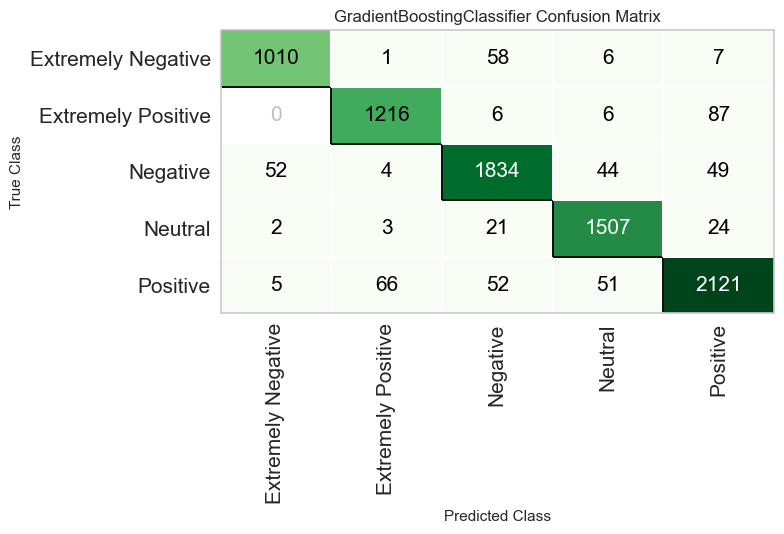

In [11]:
plot_model(gbc, plot = 'confusion_matrix')

In [12]:
pred_unseen = predict_model(gbc, data = df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.0000,0.9760,0,0,0,0,0


0.8991574512901527

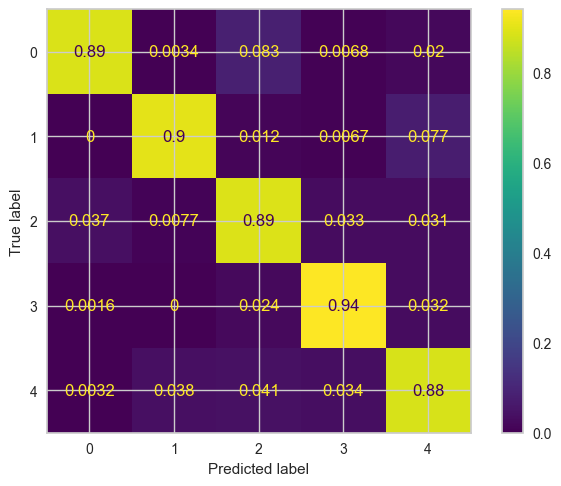

/Users/canxiuzhang/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/canxiuzhang/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/canxiuzhang/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/canxiuzhang/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarni

In [13]:
cm = confusion_matrix(pred_unseen["Sentiment"], pred_unseen["Label"], normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
accuracy_score(pred_unseen["Sentiment"], pred_unseen["Label"])